In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

from gaussian import *
from kernel import *
from MMD import *
from feedback import *

from tqdm import tqdm_notebook

%load_ext autoreload
%autoreload 2

# Question 2 : Data generation

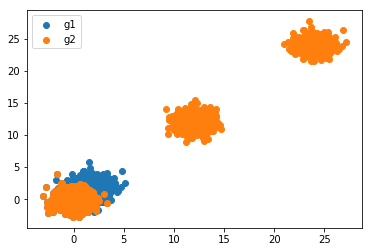

In [2]:
g1 = gaussian_mix(d=2,N=3,t=1,n=500, seed=1) 
g2 = gaussian_mix(d=2,N=3,t=12,n=500, seed=1) 

plt.scatter(g1[0], g1[1], label="g1")
plt.scatter(g2[0], g2[1], label="g2")
plt.legend()
plt.show()

In [3]:
g1.shape

(2, 1500)

# Question 3 : MMD and type I error

The MMD test is now implemented.

#### TODO : Propose a strategy to check whether MMD is a test of level α. Then, present experiments on the gaussian data. Discuss the results.

We have to check if the probability of rejecting H0 while it is true (type I error) with the MMD TST is upper-bounded by alpha.

We should be careful about what the parameter alpha is.

By looking at the shape of the decision region : the threshold of level alpha is stricly decreasing with respect to alpha, and as the acceptance region is defined as "accept H0" if the test statistic is below alpha, alpha should be large ie 95% and not 5%. We should then verify that the probability of rejecting H0 while it is true is less than 1 - alpha = 0.05.

Experiments are conducted with MMD_b and MMD_u in the following section.

+ What can be seen is that for MMD_b, parameter alpha = 0.05 produces no error under H0 but alpha = 0.95 does some and alpha = 0.99 even more. Although we still have that the probability of rejecting H0 under H0=0.0091 <= 1-alpha=0.01 hence the test is verified.

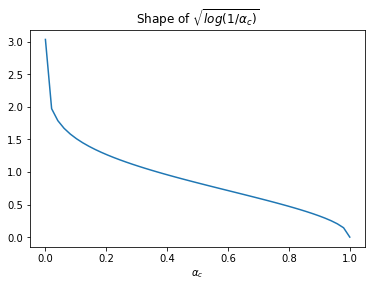

In [9]:
x = np.linspace(0.0001, 1)
y = np.sqrt(np.log(1 / x))
plt.plot(x, y)
plt.title(r"Shape of $\sqrt{log(1 / \alpha_c)}$")
plt.xlabel(r'$\alpha_c$')
plt.show()

In [10]:
%%time
# to be removed in main.py
kernel_class = GaussianKernel()
test = MMD_test(kernel_class=kernel_class, alpha=0.05, biased=True)

test.fit(X=g1, Y=g2, verbose=True)
test.get_results()

MMD test of level alpha=0.05, biased=True estimator
Kernel: Gaussian Kernel with sigma=1
Result: H0 rejected, test statistic=0.448491693291057 > threshold=0.1258939141153885
CPU times: user 211 ms, sys: 153 ms, total: 364 ms
Wall time: 430 ms


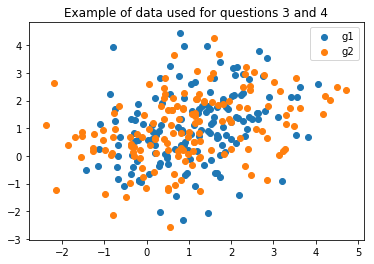

In [18]:
g1 = gaussian_mix(d=2,N=3,t=1,n=50, seed=0) 
g1 = gaussian_mix(d=2,N=3,t=1,n=50, seed=1) 

plt.scatter(g1[0], g1[1], label="g1")
plt.scatter(g2[0], g2[1], label="g2")
plt.legend()
plt.title("Example of data used for questions 3 and 4")
plt.show()

### Results using $MMD_b$

In [11]:
############ PARAMETERS ############
N = 10000
alpha_c = 0.95
biased = True
####################################

res = []
kernel_class = GaussianKernel()
g1 = gaussian_mix(d=2,N=3,t=1,n=50, seed=0) 

for i in tqdm_notebook(range(1, N+1)):
    g2 = gaussian_mix(d=2,N=3,t=1,n=50, seed=i)  # should be identical to g1 except for random seed
        
    test = MMD_test(kernel_class=kernel_class, alpha_c=alpha_c, biased=biased)

    test.fit(X=g1, Y=g2, verbose=False)
    res.append(test.test_result)

err = [x for x in res if x == 'rejected']
p = len(err)/N
print(f"proba of rejecting H0 under H0={p} <= 1-alpha_c={1-alpha_c} ? {p <= 1-alpha_c}")


proba of rejecting H0 under H0=0.0002 <= 1-alpha_c=0.050000000000000044 ? True


In [13]:
############ PARAMETERS ############
N = 10000
alpha_c = 0.99
biased = True
####################################

res = []
kernel_class = GaussianKernel()
g1 = gaussian_mix(d=2,N=3,t=1,n=50, seed=0) 

for i in tqdm_notebook(range(1, N+1)):
    g2 = gaussian_mix(d=2,N=3,t=1,n=50, seed=i)  # should be identical to g1 except for random seed
        
    test = MMD_test(kernel_class=kernel_class, alpha_c=alpha_c, biased=biased)

    test.fit(X=g1, Y=g2, verbose=False)
    res.append(test.test_result)

err = [x for x in res if x == 'rejected']
p = len(err)/N
print(f"proba of rejecting H0 under H0={p} <= 1-alpha_c={1-alpha_c} ? {p <= 1-alpha_c}")


proba of rejecting H0 under H0=0.0091 <= 1-alpha_c=0.010000000000000009 ? True


### Results using $MMD_u$

In [14]:
############ PARAMETERS ############
N = 10000
alpha_c = 0.95
biased = False
####################################

res = []
kernel_class = GaussianKernel()
g1 = gaussian_mix(d=2,N=3,t=1,n=50, seed=0) 

for i in tqdm_notebook(range(1, N+1)):
    g2 = gaussian_mix(d=2,N=3,t=1,n=50, seed=i)  # should be identical to g1 except for random seed
        
    test = MMD_test(kernel_class=kernel_class, alpha_c=alpha_c, biased=biased)

    test.fit(X=g1, Y=g2, verbose=False)
    res.append(test.test_result)

err = [x for x in res if x == 'rejected']
p = len(err)/N
print(f"proba of rejecting H0 under H0={p} <= 1-alpha_c={1-alpha_c} ? {p <= 1-alpha_c}")


proba of rejecting H0 under H0=0.0 <= 1-alpha_c=0.050000000000000044 ? True


In [16]:
############ PARAMETERS ############
N = 10000
alpha_c = 0.99
biased = False
####################################

res = []
kernel_class = GaussianKernel()
g1 = gaussian_mix(d=2,N=3,t=1,n=50, seed=0) 

for i in tqdm_notebook(range(1, N+1)):
    g2 = gaussian_mix(d=2,N=3,t=1,n=50, seed=i)  # should be identical to g1 except for random seed
        
    test = MMD_test(kernel_class=kernel_class, alpha_c=alpha_c, biased=biased)

    test.fit(X=g1, Y=g2, verbose=False)
    res.append(test.test_result)

err = [x for x in res if x == 'rejected']
p = len(err)/N
print(f"proba of rejecting H0 under H0={p} <= 1-alpha_c={1-alpha_c} ? {p <= 1-alpha_c}")


proba of rejecting H0 under H0=0.0082 <= 1-alpha_c=0.010000000000000009 ? True


# Question 4 : TST versus feedback under the null hypothesis.

Sources : 
+ the course notes (1 Introduction to statistical hypothesis testing and two-sample tests),  
+ B. Phipson and G.K. Smyth "Permutation p-values should never be zero: calculating exact p- values when permutations are randomly drawn.", Statistical Applications in Genetics and Molecular Biology, 9(1), 2010, and the SBL library

Course notes eq 1.19 defines $b$ as the test statistic : it is the number of random datasets yielding a test statistic larger than that obtained
on the observed dataset. Section 1.6.4 with eq 1.25 defines the p_value as $\hat{p} = \frac{b+1}{I + 1}$ (NB : `I` is `m` in the code following the notations from Phipson & Al.) in the case of a permutation test with no replacement.

The JSD of each dataset will be taken as the average JSD of each point.

The algorithm is as follows : 
1. Compute JSD using original labels
2. Until `n_permutations` different permutations is done:
    + Compute a new permutation over labels
    + Check if it is a new permutation
    + if yes : estimate JSD
3. $b = \sum_{permutation} \mathbb{1}_{JSD_{permutation} > JSD_{obs}}$
4. $p = \frac{b+1}{n_{permutations} + 1}$
5. Test result : accept if $p > \alpha$ else reject

We follow `sbl-ddbc-step-1-discrepancy.py` for computing local JSD but the subsample module in `random_device` is not used : permutation is rewritten.

Under $H_0$ : test should be accepted

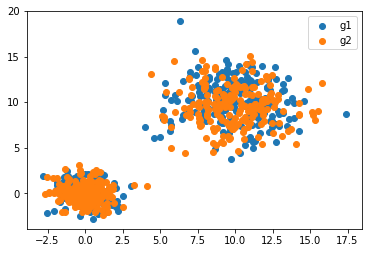

Feedback test of level alpha=0.05
Number of permutations=50
jsd_obs=0.015571730825168521, mean jsd_permutations=0.012853614982934214
Result: H0 accepted, test statistic=8, p_value=0.17647058823529413 >= alpha=0.05
Wall time: 1.33 s


In [12]:
%%time
# to be removed in main.py
###################### PARAMETERS ########################
n_permutations = 50  # number of permutation tests
g1 = gaussian_mix(d=2,N=2,t=10,n=200, s=5, seed=1) 
g2 = gaussian_mix(d=2,N=2,t=10,n=200, s=5, seed=2)  # should be identical to g1 except for random seed
##########################################################
plt.scatter(g1[0], g1[1], label="g1")
plt.scatter(g2[0], g2[1], label="g2")
plt.legend()
plt.show()

rd.seed(0)
kofn_power = 0.66
fk = DDBC_feedback(
    g1, g2,
)
fk.permutation_test(n_permutations=n_permutations)
print(fk)

#### Producing results on several gaussian data

In [20]:
def JSD_test(g1,g2,n=50, alpha=0.05):
    rd.seed(0)
    kofn_power = 0.66
    fk = DDBC_feedback(
        g1, g2, alpha=alpha
    )
    fk.permutation_test(n_permutations=n)
    return fk   

With the same datas as question 3, we have the same result.

In [21]:
N=10000
alpha = 0.05

stat = []
p_val = []

g1 = gaussian_mix(d=2,N=3,t=1,n=50, seed=0) 
for i in tqdm_notebook(range(1, N+1)):

    g2 = gaussian_mix(d=2,N=3,t=1,n=50, seed=i)  # should be identical to g1 except for random seed
    fk = JSD_test(g1,g2, n=15, alpha=alpha)
    stat.append(fk.b)
    p_val.append(fk.p_value)


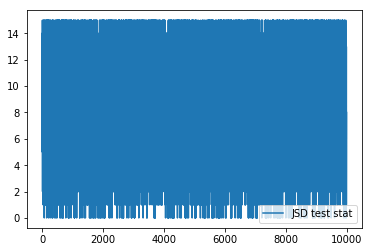

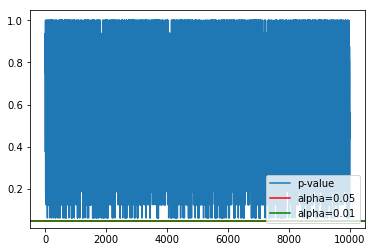

In [20]:
plt.plot(stat,label = 'JSD test stat')
plt.legend()
plt.show()

plt.plot(p_val, label = 'p-value')
plt.axhline(y=0.05, color='r', linestyle='-',label = 'alpha=0.05')
plt.axhline(y=0.05, color='g', linestyle='-',label = 'alpha=0.01')
plt.legend()
plt.show()

In [13]:
np.mean(np.array(p_val) > 0.05)

1.0

In [19]:
#type I error
print(sum(np.array(p_val) <= 0.05)/N)
print(sum(np.array(p_val) <= 0.01)/N)

0.0
0.0


# Question 5 : TST versus feedback under the alternative

Under $H_1$ : test should be rejected

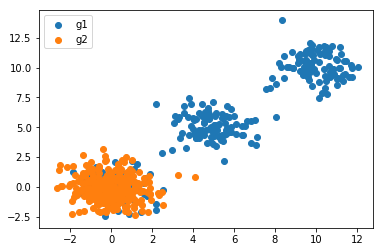

Feedback test of level alpha=0.05
Number of permutations=50
jsd_obs=0.45222371256371524, mean jsd_permutations=0.014271674090087958
Result: H0 rejected, test statistic=0, p_value=0.0196078431372549 < alpha=0.05
Wall time: 1.03 s


In [23]:
%%time
###################### PARAMETERS ########################
n_permutations = 50  # number of permutation tests
g1 = gaussian_mix(d=2,N=3,t=5,n=100, s=1, seed=1) 
g2 = gaussian_mix(d=2,N=3,t=0,n=100, s=1, seed=2)  # should be different from g1
##########################################################

plt.scatter(g1[0], g1[1], label="g1")
plt.scatter(g2[0], g2[1], label="g2")
plt.legend()
plt.show()

rd.seed(0)
kofn_power = 0.66
fk = DDBC_feedback(
    g1, g2,
)
fk.permutation_test(n_permutations=n_permutations)
print(fk)

### Comparison of the variation of the test statistic of MMD, and that of the JS divergence returned by the feedback

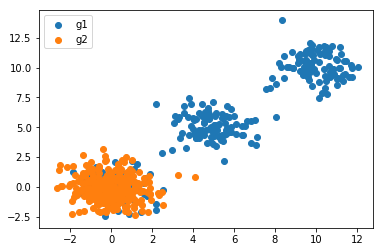

JSD Test statistic
0
MMD Test statistic
0.45602427920900546
Wall time: 1.09 s


In [24]:
%%time
###################### PARAMETERS ########################
n_permutations = 50  # number of permutation tests
g1 = gaussian_mix(d=2,N=3,t=5,n=100, s=1, seed=1) 
g2 = gaussian_mix(d=2,N=3,t=0,n=100, s=1, seed=2)  # should be different from g1
##########################################################

plt.scatter(g1[0], g1[1], label="g1")
plt.scatter(g2[0], g2[1], label="g2")
plt.legend()
plt.show()

rd.seed(0)
kofn_power = 0.66
fk = DDBC_feedback(
    g1, g2,
)
fk.permutation_test(n_permutations=n_permutations)
print('JSD Test statistic')
print(fk.b)

kernel_class = GaussianKernel()
test = MMD_test(kernel_class=kernel_class, alpha=0.05, biased=True)

test.fit(X=g1, Y=g2, verbose=False)
print('MMD Test statistic')
print(test.T)

In [25]:
def compare(g1, g2, test, param, n_permutations=20, alpha=0.95):
    """
    Parameters
    ---------
        test : MMD or JSD test 
        param : kofn_power for MMD or sigma for MMD
    """
    assert test in ["JSD", "MMD"]
    if test == "JSD":
        #JSD
        rd.seed(0)
        fk = DDBC_feedback(
            g1, g2, kofn_power=param, alpha=1-alpha
        )
        fk.permutation_test(n_permutations=n_permutations)
        return fk.b, fk.test_result, fk.p_value
    else:
        #MMD
        kernel_class = GaussianKernel(sigma=param)
        test = MMD_test(kernel_class=kernel_class, alpha_c=alpha, biased=True)

        test.fit(X=g1, Y=g2, verbose=False)

        return test.T, test.test_result
    

def compare_echantillon(test, param_list, N_test=50, pas=0.1, d=2, N_dim=3, N_translations=10, n=50, s=1, n_permutations=20, alpha=0.95):

    assert test in ["JSD", "MMD"]

    # generate data
    data = {}
    data["g1"] = gaussian_mix(d=d,N=N_dim,t=0,n=n, s=s, seed=0)
    data["g2"] = {}
    for t in range(1,N_translations):
        data["g2"][t] = {}
        for i in range(1, N_test+1):
            data["g2"][t][i] = gaussian_mix(d=d,N=N_dim,t=t*pas,n=n, s=s, seed=i)

    translate = np.array(range(1,N_translations)) * pas
    
    # for storing results
    err_type_2_df = pd.DataFrame(index=translate)
    test_stat_df = pd.DataFrame(index=translate)
    if test == "JSD":
        test_p_val_df = pd.DataFrame(index=translate)

    for t in tqdm_notebook(range(1,N_translations)):

        for param in param_list:

            test_stat_list = []
            test_result_list = []
            if test == "JSD":
                test_p_val_list = []

            for i in range(1, N_test+1):

                comparison = compare(g1=data["g1"], g2=data["g2"][t][i], test=test, param=param, n_permutations=n_permutations, alpha=alpha)
                if test == "MMD":
                    test_stat, test_result = comparison
                else:
                    test_stat, test_result, test_p_val = comparison                
                test_stat_list.append(test_stat)
                test_result_list.append(test_result)
                if test == "JSD":
                    test_p_val_list.append(test_p_val)

            test_stat_df.loc[t * pas, param] = np.mean(np.array(test_stat_list))
            err_type_2_df.loc[t * pas, param] = np.mean(np.array(test_result_list) == "accepted")
            if test == "JSD":
                test_p_val_df.loc[t * pas, param] = np.mean(np.array(test_p_val_list))

    if test == "JSD":
        return err_type_2_df, test_stat_df, test_p_val_df
    else:
        return err_type_2_df, test_stat_df

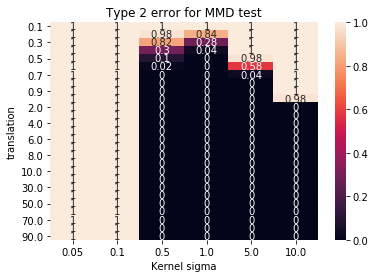

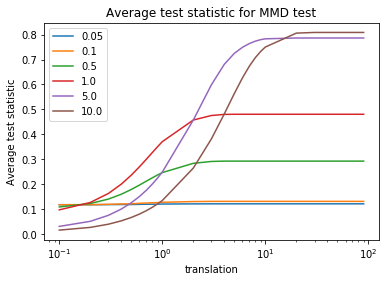

In [6]:
###########################################################################
test = "MMD"
param_list =  [0.05, 0.1, 0.5, 1, 5, 10]
alpha=0.95
n_permutations=20
N_test=50  # number test for each configuration

# parameters for Gaussian
pas_list=[0.1, 1, 10]
d=2
N_dim=3
N_translations=10
n=50
s=1
###########################################################################
result = {}
for pas in pas_list:
    result[pas] = compare_echantillon(
        test, param_list, 
        N_test=N_test, pas=pas, d=d, N_dim=N_dim, N_translations=N_translations, n=n, s=s, n_permutations=n_permutations, 
        alpha=alpha
    )


err_type_2_df = pd.concat([result[pas][0] for pas in pas_list], axis=0)
test_stat_df = pd.concat([result[pas][1] for pas in pas_list], axis=0)
if test == "JSD":
    test_p_val_df = pd.concat([result[pas][2] for pas in pas_list], axis=0)


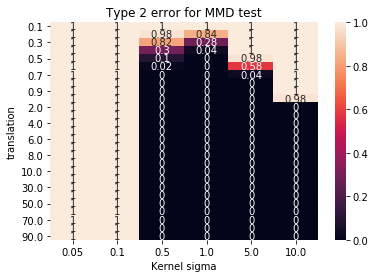

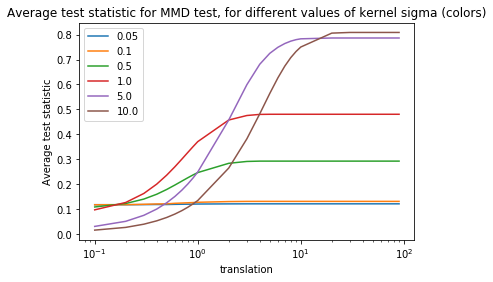

In [8]:
# display results
err_type_2_df.index = np.round(err_type_2_df.index, 5)

plt.figure()
ax = sns.heatmap(err_type_2_df, annot=True)
ax.set_title(f"Type 2 error for {test} test")
ax.set_ylabel("translation")
xlabel = "kofn power" if test == "JSD" else "Kernel sigma"
ax.set_xlabel(xlabel)
plt.show()

ax = test_stat_df.plot(title=f"Average test statistic for {test} test, for different values of kernel sigma (colors)")
ax.set_xlabel("translation")
ax.set_ylabel("Average test statistic")
ax.set_xscale('log')
plt.show();

Results :

+ MMD : 
    + When the kernel width is either too small or too large, the type-2 error increases very importantly. In particular, small kernel width even cannot detect distributions that are very different, for example when the translation parameter is of 10. This can be explained by looking at the evolution of the test statistic.
    + Under the alternative hypothesis, with the increasing of translation, the average test statistic is at first increasing slowly, than increases very fast and finally becomes almost constant. When sigma is larger, we can see that the 2nd phase of increasing is more important but happens later. This impacts the accuracy of the test under the alternative hypothesis : as we reject the null hypothesis when the test statistic is above the threshold corresponding to the level alpha, the tests perform better when this increasing happens earlier.
    + `sigma=1` seems to be an overall good parameter for `alpha=0.95`.
    
+ JSD : 
    + Increasing the number of neighbors ie `kofn_power` seem to decrease type 2 error. However, this parameter is limited by the number of samples available.
    + Instead of visualizing the average test statistic $b$, we can directly look at the average p-value. We can see that the increase of `kofn_power` makes the p-value decrease faster when the translation parameter increases : it is more easy to reject the null hypothesis with more neighbors.
    
+ Finally, we can compare the results between MMD and JSD. Both have parameters under which the test perform well when the translation parameter is over 0.4, but for translation under 0.4, JSD has slightly lower type 2 error. Depending on the number of permutations tests performed, JSD is in general slower than MMD.

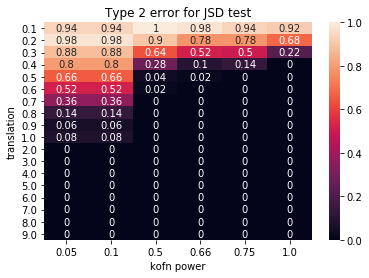

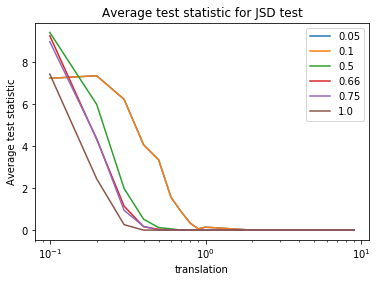

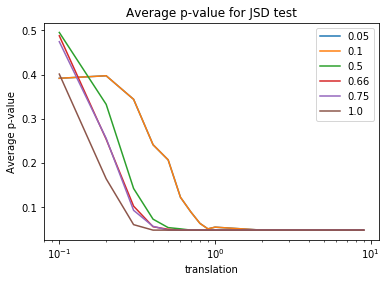

In [4]:
###########################################################################
test = "JSD"
param_list = [0.05, 0.1, 0.5, 0.66, 0.75, 1]
alpha=0.95
n_permutations=20
N_test=50  # number test for each configuration

# parameters for Gaussian
pas_list=[0.1, 1]
d=2
N_dim=3
N_translations=10
n=50
s=1
###########################################################################
result = {}
for pas in pas_list:
    result[pas] = compare_echantillon(
        test, param_list, 
        N_test=N_test, pas=pas, d=d, N_dim=N_dim, N_translations=N_translations, n=n, s=s, n_permutations=n_permutations, 
        alpha=alpha
    )


err_type_2_df = pd.concat([result[pas][0] for pas in pas_list], axis=0)
test_stat_df = pd.concat([result[pas][1] for pas in pas_list], axis=0)
if test == "JSD":
    test_p_val_df = pd.concat([result[pas][2] for pas in pas_list], axis=0)


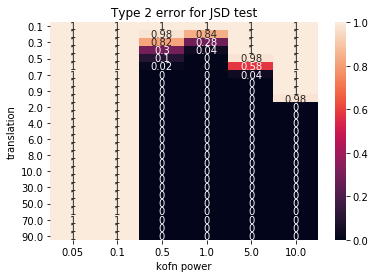

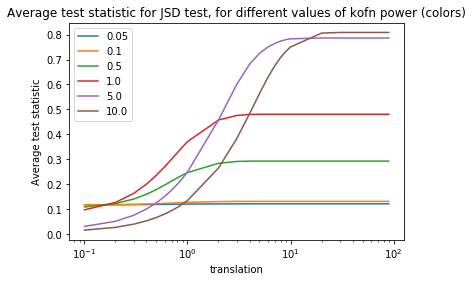

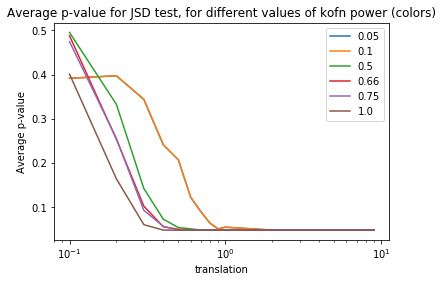

In [11]:
# display results
err_type_2_df.index = np.round(err_type_2_df.index, 5)

plt.figure()
ax = sns.heatmap(err_type_2_df, annot=True)
ax.set_title(f"Type 2 error for {test} test")
ax.set_ylabel("translation")
xlabel = "kofn power" if test == "JSD" else "Kernel sigma"
ax.set_xlabel(xlabel)
plt.show()

ax = test_stat_df.plot(title=f"Average test statistic for {test} test, for different values of kofn power (colors)")
ax.set_xlabel("translation")
ax.set_ylabel("Average test statistic")
ax.set_xscale('log')
plt.show();

if test == "JSD":
    ax = test_p_val_df.plot(title=f"Average p-value for {test} test, for different values of kofn power (colors)")
    ax.set_xlabel("translation")
    ax.set_ylabel("Average p-value")
    ax.set_xscale('log')
    plt.show();

In [15]:
###########################################################################
test = "MMD"
param_list =  [0.05, 0.1, 0.5, 1, 5, 10]
alpha=0.95
n_permutations=20
N_test=10000  # number test for each configuration

# parameters for Gaussian
pas_list=[0.]
d=2
N_dim=3
N_translations=2
n=50
s=1
###########################################################################
result = {}
for pas in pas_list:
    result[pas] = compare_echantillon(
        test, param_list, 
        N_test=N_test, pas=pas, d=d, N_dim=N_dim, N_translations=N_translations, n=n, s=s, n_permutations=n_permutations, 
        alpha=alpha
    )


err_type_2_df = pd.concat([result[pas][0] for pas in pas_list], axis=0)
test_stat_df = pd.concat([result[pas][1] for pas in pas_list], axis=0)
if test == "JSD":
    test_p_val_df = pd.concat([result[pas][2] for pas in pas_list], axis=0)


In [16]:
err_type_2_df

,0.05,0.1,0.5,1.0,5.0,10.0
0.0,1.0,1.0,0.9978,0.9959,1.0,1.0


In [18]:
###########################################################################
test = "JSD"
param_list =  [0.5, 0.66, 0.75]
alpha=0.95
n_permutations=20
N_test=1000  # number test for each configuration

# parameters for Gaussian
pas_list=[0.]
d=2
N_dim=3
N_translations=2
n=50
s=1
###########################################################################
result = {}
for pas in pas_list:
    result[pas] = compare_echantillon(
        test, param_list, 
        N_test=N_test, pas=pas, d=d, N_dim=N_dim, N_translations=N_translations, n=n, s=s, n_permutations=n_permutations, 
        alpha=alpha
    )


err_type_2_df = pd.concat([result[pas][0] for pas in pas_list], axis=0)
test_stat_df = pd.concat([result[pas][1] for pas in pas_list], axis=0)
if test == "JSD":
    test_p_val_df = pd.concat([result[pas][2] for pas in pas_list], axis=0)

In [ ]:
err_type_2_df